In [30]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
import tables as tb
import itertools
import re
markers=itertools.cycle(('o','v','s','^','<','>','p','P','*','h','H','+','x','X','D','d','|','_'))

iso_list = ['Xe135', 'Kr83', 'I135','U235', 'U236', 'U238', 'Pu238','Pu239', 'Pu240', 'Pu241', 'Pu242', 'Am241', 'Am242', 'H3']

colors = matplotlib.pyplot.rcParams['axes.prop_cycle'].by_key()['color']

def merge(a,b):
    final = np.zeros (len(a)+len(b))
    for i in range(len(a)):
        final[2*i]   = a[i]
        final[2*i+1] = b[i]
    return final

def elem_aaa(iso):
    m = re.match(r"(?P<letters>[a-zA-Z]+)(?P<the_rest>.+)$", iso)
    return [m.group('letters'), m.group('the_rest')]

def read_keff_h5(file, step):
    db = tb.open_file(file, mode='r')
    sim_param = db.root.simulation_parameters
    # Keff at t=0 depletion step
    k_0 = np.array([x['keff_bds'][0] for x in sim_param.iterrows()])
    k_0_e = np.array([x['keff_bds'][1] for x in sim_param.iterrows()])
    # Keff at t=end depletion step
    k_1 = np.array([x['keff_eds'][0] for x in sim_param.iterrows()])
    k_1_e = np.array([x['keff_eds'][1] for x in sim_param.iterrows()])
    db.close()
    day = step*np.arange(len(k_0))
    return day, k_0, k_1, k_0_e, k_1_e

def read_iso_m_h5(db_file, iso_list, step):
    db = tb.open_file(db_file, mode='r')
    fuel_bef_mat = db.root.materials.fuel.before_reproc.parameters
    fuel_bef = db.root.materials.fuel.before_reproc.comp
    isomap = fuel_bef.attrs.iso_map

    fuel_after_mat = db.root.materials.fuel.after_reproc.parameters
    fuel_after = db.root.materials.fuel.after_reproc.comp

    mass_b = np.array([x['mass'] for x in fuel_bef_mat.iterrows()])
    vol_b = np.array([x['volume'] for x in fuel_bef_mat.iterrows()])
    dens_b = np.array([x['density'] for x in fuel_bef_mat.iterrows()])

    mass_a = np.array([x['mass'] for x in fuel_after_mat.iterrows()])
    vol_a = np.array([x['volume'] for x in fuel_after_mat.iterrows()])
    dens_a = np.array([x['density'] for x in fuel_after_mat.iterrows()])
    days_b = np.array(step*np.arange(len(mass_b)))
    days_a = np.arange(step, (len(mass_a)+1)*(step), step, dtype=np.float64)

    mass_b = {}
    mass_a = {}
    for iso in iso_list:
        mass_b[iso] = 1e-6*np.array([row[isomap[iso]] for row in fuel_bef])
        mass_a[iso] = 1e-6*np.array([row1[isomap[iso]] for row1 in fuel_after])
    db.close()
    return mass_b, mass_a, days_b # mass in tonnes

In [31]:
db_file_2_5d = '/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/data/db/3d_10950d_jeff.h5'
step_2_5d = 3.0/365.0 # days --> EFPY
days_2_5d, k_bds_2_5d, k_eds_2_5d, k_bds_err_2_5d, k_eds_err_2_5d = read_keff_h5(db_file_2_5d, step_2_5d)
mass_before_2_5d, mass_after_2_5d, t_2_5d = read_iso_m_h5(db_file_2_5d, iso_list, step_2_5d)

In [32]:
db_file_5d = '/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/data/db/time_refinement/6d_9546d_jeff.h5'
step_5d = 6.0/365.0 # days --> EFPY

days_5d, k_bds_5d, k_eds_5d, k_bds_err_5d, k_eds_err_5d = read_keff_h5(db_file_5d, step_5d)
mass_before_5d, mass_after_5d, t_5d = read_iso_m_h5(db_file_5d, iso_list, step_5d)[:3000]

In [33]:
db_file_7_5d = '/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/data/db/time_refinement/12d_9516d_jeff.h5'
step_7_5d = 12.0/365.0 # days --> EFPY
days_7_5d, k_bds_7_5d, k_eds_7_5d, k_bds_err_7_5d, k_eds_err_7_5d = read_keff_h5(db_file_7_5d, step_7_5d)
mass_before_7_5d, mass_after_7_5d, t_7_5d = read_iso_m_h5(db_file_7_5d, iso_list, step_7_5d)

In [34]:
db_file_24d = '/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/data/db/time_refinement/24d_9600d_jeff.h5'
step_24d = 24.0/365.0 # days

days_30d, k_bds_30d, k_eds_30d, k_bds_err_30d, k_eds_err_30d = read_keff_h5(db_file_24d, step_24d)
mass_before_24d, mass_after_24d, t_24d = read_iso_m_h5(db_file_24d, iso_list, step_24d)
#days2 = np.linspace(step, (len(k_eds))*(step), num=len(k_eds), endpoint=True)

In [ ]:
db_file_15d = '/home/andrei2/Desktop/git/meitner-task-2/saltproc_results/time_step_refinement/5leu/db_saltproc15d_5565d.h5'
step15d = 15.0/365.0 # days

days_15d, k_bds_15d, k_eds_15d, k_bds_err_15d, k_eds_err_15d = read_keff_h5(db_file_15d, step15d)

1591 1591
793 793
400 400


<IPython.core.display.Javascript object>


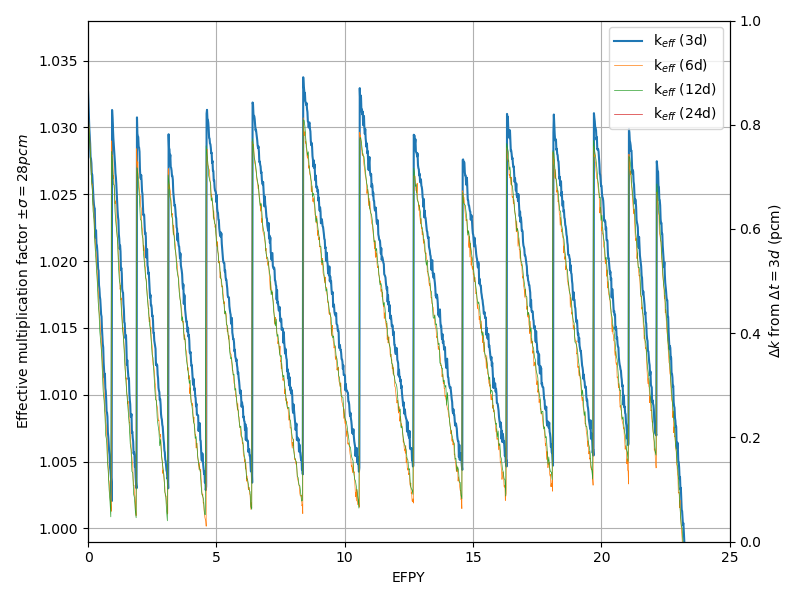

In [35]:
print(len(k_bds_2_5d[:-468][::2]), len(k_bds_5d))
print(len(k_bds_2_5d[:-480][::4]), len(k_bds_7_5d))
print(len(k_bds_2_5d[:-450][::8]), len(k_bds_30d))
#print(len(k_bds_2_5d[::12]), len(k_bds_30d[:-11]))
#print(len(k_bds_2_5d[::3]), len(k_bds_7_5d[:-15]))
# Initialize figure
fig_keff_1 = matplotlib.pyplot.figure(1, figsize=[8,6])
ax1 = fig_keff_1.subplots()
ax1.grid(True)
ax1.plot(days_2_5d[:-468][::2], (k_eds_2_5d[:-468][::2]+k_bds_2_5d[:-468][::2])/2, '-', label='k$_{eff}$ (3d)', linewidth=1.5) # at BDS (feed LEU 19.79%)
ax1.plot(days_2_5d[:-468][::2], (k_eds_5d+k_bds_5d)/2, '-', label='k$_{eff}$ (6d)', linewidth=0.5)
ax1.plot(days_2_5d[:-480][::4], (k_eds_7_5d+k_bds_7_5d)/2, '-', label='k$_{eff}$ (12d)', linewidth=0.5)
ax1.plot(days_2_5d[:-450][::8], (k_eds_30d+k_bds_30d), '-', label='k$_{eff}$ (24d)', linewidth=0.5)
#ax.plot(days_5, k_bds_5, '-', label='k$_{eff}$ at BDS (feed LEU 5%)', linewidth=1.5)
#ax.plot(days2, k_eds, '-', label='k$_{eff}$ at EDS', linewidth=1.5)

#ax.fill_between(days, k_bds-k_bds_err, k_bds+k_bds_err, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
#ax.fill_between(days2, k_eds-k_eds_err, k_eds+k_eds_err, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
ax1.legend(loc=0)
ax1.set_ylabel(r'Effective multiplication factor $\pm\sigma=28pcm$')
ax1.set_xlabel('EFPY')
#ax1.set_title('Multiplication factor for online reprocessing case with 5% LEU feed')
ax1.set_xlim(0,25)
ax1.set_ylim([0.999, 1.038])

ax2 = ax1.twinx()
ax2.set_prop_cycle(color=colors[1:])
ax2.set_ylabel(r'$\Delta k$ from $\Delta t = 3d$ (pcm)')
#ax2.plot(days_2_5d[:-450][::8], 1e+5*(k_eds_2_5d[:-450][::8] - k_eds_30d), '--', color='red', label='24d', linewidth=1)
#ax2.plot(days_2_5d[:-480][::4], 1e+5*(k_eds_2_5d[:-480][::4] - k_eds_7_5d), '--', color='blue', label='15d', linewidth=1)
#ax2.plot(days_5d[:-41], 1e+5*(k_bds_2_5d[::2] - k_bds_5d[:-41]), '--', label='5d', linewidth=0.7)
#ax2.plot(days_7_5d[:-15], 1e+5*(k_bds_2_5d[::3] - k_bds_7_5d[:-15]), '--', label='7.5d', linewidth=0.7)
#ax2.plot(days_15d[:-69], 1e+5*(k_bds_2_5d[::6] - k_bds_15d[:-69]), '--', label='15d', linewidth=0.7)
#ax2.plot(days_30d[:-11], 1e+5*(k_bds_2_5d[::12] - k_bds_30d[:-11]), '--', label='30d', linewidth=0.7)
#ax2.legend(loc=3)
#ax2.set_ylim(-10, 2000)

fig_keff_1.tight_layout()
fig_keff_1.show()
#fig_keff_1.savefig('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/dissertation/figures/ch4/keff_time_refinement.png',bbox_inches='tight', dpi=700)
#fig_keff_1.savefig('/home/andrei2/Desktop/git/publications/msbr-reproc/figures/keff_rem_cases.png',bbox_inches='tight', dpi=700)
#print("Keff drop over period %f" %(k_bds_30d[0]-k_eds_30d[-1]))
#print("Time interval %f days" %(days_5d[-1]*365))
#print("%f steps with 2.5 days inteval" %(days_5d[-1]*365/2.5))
#print("%f steps with 7.5 days inteval" %(days_5d[-1]*365/7.5))

<IPython.core.display.Javascript object>


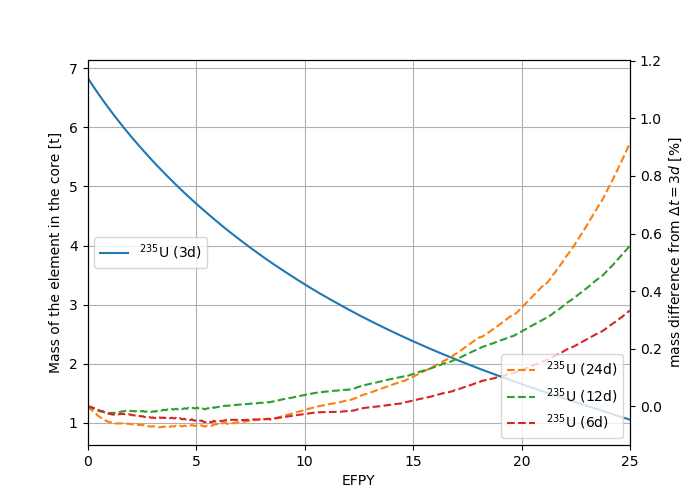

[0.00000000e+00 8.21917808e-03 1.64383562e-02 ... 2.99835616e+01
 2.99917808e+01 3.00000000e+01] 3651
[0.00000000e+00 1.64383562e-02 3.28767123e-02 ... 2.61205479e+01
 2.61369863e+01 2.61534247e+01] 1592
1592
0.0
1591 1591
729 793
9548.999999999998


In [41]:
plot_iso = ['U235']

# Initialize figure
fig_3 = matplotlib.pyplot.figure(3, figsize=[7,5])
ax1 = fig_3.subplots()
ax1.grid(True)

for i in plot_iso:
    m=next(markers)
    el_aaa = elem_aaa(i)
    k_name = "$^{"+str(el_aaa[-1])+"}$"+str(el_aaa[0])
    ax1.plot(t_2_5d[:-468], mass_before_2_5d[i][:-468], '-', label=str(k_name)+" (3d)")
    #ax.semilogy(t_5d, mass_before_5d[i], '--',marker=m, markevery=0.5, label=str(i)+"(6d)")
    #ax.semilogy(t_7_5d, mass_before_7_5d[i], '--',marker=m, markevery=0.7, label=str(i)+"(15d)")
ax1.legend(loc=6)
#ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.set_ylabel('Mass of the element in the core [t]')
ax1.set_xlabel('EFPY')
#ax.set_title('Multiplication factor for online reprocessing case ' + str(EOS) +' days')
ax1.set_xlim(0, 25)
#ax.set_ylim(2e-1, 3e+1)
#ax.set_ylim(2e-1, 7.5e+4)

ax2 = ax1.twinx()
ax2.set_prop_cycle(color=colors[1:])
ax2.set_ylabel(r'mass difference from $\Delta t = 3d$ [%]')
for i in plot_iso:
    m=next(markers)
    el_aaa = elem_aaa(i)
    k_name = "$^{"+str(el_aaa[-1])+"}$"+str(el_aaa[0])
    ax2.plot(t_2_5d[:-450][::8],
         100*(mass_before_24d[i]-mass_before_2_5d[i][:-450][::8])/mass_before_2_5d[i][:-450][::8],
         '--', label=str(k_name)+" (24d)")
    ax2.plot(t_2_5d[:-476][::4],
         100*(mass_before_7_5d[i]-mass_before_2_5d[i][:-476][::4])/mass_before_2_5d[i][:-476][::4],
         '--', label=str(k_name)+" (12d)")
    ax2.plot(t_2_5d[:-468][::2],
         100*(mass_before_5d[i]-mass_before_2_5d[i][:-468][::2])/mass_before_2_5d[i][:-468][::2],
         '--', label=str(k_name)+" (6d)")
#ax2.plot(days_7_5d[:-5], 1e+5*(k_bds_5d[::6] - k_bds_30[:-5]), '--', color='red', label='30d', linewidth=1)
#ax2.plot(days_15d[:-56], 1e+5*(k_bds_5d[::3] - k_bds_15d[:-56]), '--', color='blue', label='15d', linewidth=1)
#ax2.plot(days_5d[:-41], 1e+5*(k_bds_2_5d[::2] - k_bds_5d[:-41]), '--', label='5d', linewidth=0.7)
#ax2.plot(days_7_5d[:-15], 1e+5*(k_bds_2_5d[::3] - k_bds_7_5d[:-15]), '--', label='7.5d', linewidth=0.7)
#ax2.plot(days_15d[:-69], 1e+5*(k_bds_2_5d[::6] - k_bds_15d[:-69]), '--', label='15d', linewidth=0.7)
#ax2.plot(days_30d[:-11], 1e+5*(k_bds_2_5d[::12] - k_bds_30d[:-11]), '--', label='30d', linewidth=0.7)
ax2.legend(loc=4)
#ax2.set_ylim(-10, 2000)
print(t_2_5d, len(t_2_5d))
print(t_5d, len(t_5d))
print(len(t_5d - t_2_5d[:-468][::2]))
print(np.mean(t_5d - t_2_5d[:-468][::2]))
print(len(k_bds_2_5d[:-468][::2]), len(k_bds_5d))
print(len(k_bds_2_5d[:-5][::5]), len(k_bds_7_5d))
print(365*t_2_5d[-468])
fig_3.show()
#fig_3.savefig('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/dissertation/figures/ch4/u238_time_refinement.png',bbox_inches='tight', dpi=700)
